# HISTOGRAM


## Contrast Limited Adaptive Histogram Equalization (CLAHE)

### Adaptif Histogram Equalisation (AHE) biasa cenderung memperbesar kontras di wilayah gambar yang hampir konstan, karena histogram di wilayah tersebut sangat terkonsentrasi. Akibatnya, AHE dapat menyebabkan noise diperkuat di daerah yang hampir konstan. 

### Contrast Limited AHE (CLAHE) merupakan varian dari ekualisasi histogram adaptif dimana amplifikasi kontras dibatasi, sehingga dapat mengurangi masalah noise ini.

### Histogram asli setiap blok dipotong dari atas jika melebihi puncak yang telah ditentukan (batas klip). Porsi histogram yang berada di atas batas klip didistribusikan secara seragam di seluruh rentang piksel histogram:
![alt text](gambar_Histogram_CLAHE.png "Title")

### clahe = cv2.createCLAHE(clip_limit, block_size)
- Clip_limit: menginformasikan fungsi berapa banyak puncak histogram yang harus dipotong. Jika nilainya 1, maka tidak ada pemotongan yang dilakukan. Biasanya, dijaga pada 2 atau 3. Semakin tinggi batas klip, semakin diperkuat kontras lokalnya.
- block_size:  ukuran blok yang ingin Anda bagi gambarnya.

Setelah objek clahe dibuat, maka bisa digunakan perintah di bawah ini untuk memanggilnya.
### img_out = clahe.apply(img_in)
- img_out: gambar yang di hasilkan
- img_in: gambar masukkan


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

gambar=cv2.imread('anak kucing grey.jpg',0)
# gambar_bgr = cv2.cvtColor(gambar,cv2.COLOR_GRAY2RGB)

gambar_ekual = cv2.equalizeHist(gambar)
# rgb_ekualisasi = cv2.cvtColor(gambar_ekual,cv2.COLOR_GRAY2RGB);

gambar_hori=np.concatenate((gambar, gambar_ekual),axis=1)


cv2.imshow('Perbandingan Gambar Asli dan Gambar Ekualisasi',gambar_hori)

#cv2.imshow('concatenated_Verti',img_concate_Verti)
cv2.waitKey(0)
cv2.destroyAllWindows()

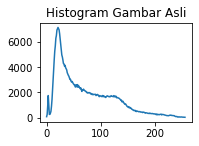

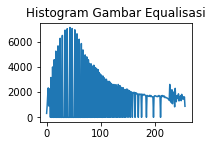

In [2]:
hist1 = cv2.calcHist([gambar],[0],None,[256],[0,256])
hist2 = cv2.calcHist([gambar_ekual],[0],None,[256],[0,256])


plt.subplot(221), plt.plot(hist1)
plt.title('Histogram Gambar Asli')
plt.show()
plt.subplot(222), plt.plot(hist2)
plt.title('Histogram Gambar Equalisasi')
plt.show()


In [9]:
clahe=cv2.createCLAHE(clipLimit=3.0, tileGridSize=(6,6))
gambar_clahe=clahe.apply(gambar)

In [13]:
cv2.imshow('Gambar Clahe', gambar_clahe)
cv2.waitKey()
cv2.destroyAllWindows()

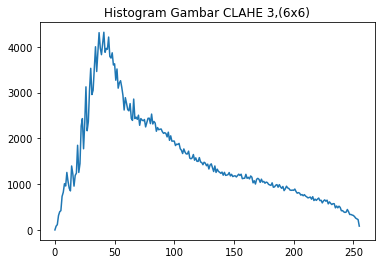

In [14]:
hist=cv2.calcHist([gambar_clahe1],[0],None,[256],[0,256])
plt.title('Histogram Gambar CLAHE 3,(6x6)')
plt.plot(hist)

In [15]:
gambar_horz=np.concatenate((gambar,gambar_ekual,gambar_clahe),axis=1)
cv2.imshow('Perbandingan gambar asli, gambar Equalisasi dan gambar CLAHE', gambar_horz)
cv2.waitKey()
cv2.destroyAllWindows()

## Historam CLAHE pada Gambar Berwarna

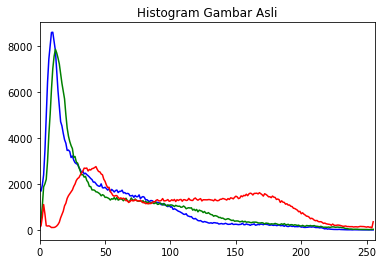

In [16]:
gambar = cv2.imread('anak kucing.jpg')
# gambar_asli = cv2.cvtColor(gambar,cv2.COLOR_BGR2RGB)
# plt.imshow(gambar_asli)


pisah_gambar=cv2.split(gambar)
warna=('b','g','r')

# lakukan perlukangan untuk setiap warna r,g dan b untuk histogram
for i, color in zip(pisah_gambar,warna):
    histr1=cv2.calcHist([i],[0],None,[256],[0,256])
    plt.plot(histr1,color=color)
    plt.xlim([0,256])
plt.title('Histogram Gambar Asli')
plt.show()

cv2.imshow('Gambar Asli',gambar)
cv2.waitKey()
cv2.destroyAllWindows()

In [17]:
pisah_gambar=cv2.split(gambar)
warna=('b','g','r')
gambar_channel=[]
for i, color in zip(pisah_gambar,warna):
    gambar_channel.append(cv2.equalizeHist(i))
    gambar_equalisasi=cv2.merge(gambar_channel)

# tampilkan gambar secara horizontal 

cv2.imshow('Gambar Equalisasi',gambar_equalisasi)
cv2.waitKey()
cv2.destroyAllWindows()

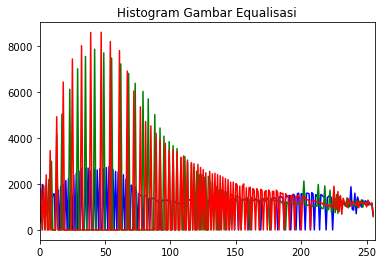

In [18]:
rgb_equalisasi=cv2.cvtColor(gambar_equalisasi,cv2.COLOR_BGR2RGB)
pisah_gambar=cv2.split(rgb_equalisasi)

# lakukan perlukangan untuk setiap warna r,g dan b untuk histogram
for i, color in zip(pisah_gambar,warna):
    histr2=cv2.calcHist([i],[0],None,[256],[0,256])
    plt.plot(histr2, color=color)
    plt.xlim([0,256])

# Title untuk histogram
plt.title('Histogram Gambar Equalisasi')
# Tampilkan histogram
plt.show()

In [21]:
# Pisahkan warna pada gambar
pisah_gambar=cv2.split(gambar)

# Buat CLAHE
clahe=cv2.createCLAHE(clipLimit=3.0, tileGridSize=(6,6))
warna=('b','g','r')

gambar_cenel=[]
# Tampilkan CLAHE pada setial warna
for i,color in zip(pisah_gambar,warna):
    gambar_cenel.append(clahe.apply(i))

# Gabung chanel
gambar_clahe=cv2.merge(gambar_cenel)

# Tampilkan gambar CLAHE
cv2.imshow('Gambar CLAHE', gambar_clahe)
cv2.waitKey()
cv2.destroyAllWindows()

In [20]:
# Atur gambar untuk tampil bersamaan secara horizontal
gambar_horz=np.concatenate((gambar,gambar_equalisasi,gambar_clahe),axis=1)
# Tampilkan gambar
cv2.imshow('Perbandingan gambar asli, gambar Equalisasi dan gambar CLAHE', gambar_horz)
cv2.waitKey()
cv2.destroyAllWindows()